# International Debt Statistics and Projection


## Team Members and Github Ids
Janelle Bauske (GitHub ID: jbauske01)

Punami Chowdary (GitHub ID: pcdukkip)

Nandita Ghildyal (GitHub ID: gappy401) (Point of contact)

Jill Karia (Github ID: jillkaria270)

Sandra Chiwike (Github ID: SandraNgozi)



#### Our aim is to develop a model that predicts the likelihood of a country defaulting on its external, international loans from the World Bank or IMF. Unlike traditional models that rely solely on the financial factors of a country, our approach will model the country’s historical debt statistics and various socio-economic factors to assess its ability to repay external loans. The end goal of our model is to identify the root causes of economic instability affecting a country, which, in turn, affects its ability to repay a loan.

#### Once these factors are identified, organizations such as the World Bank can work proactively with countries to target areas of instability via monetary aid to reduce chances of defaulting. This model can help facilitate more sustainable lending practices for organizations like the World Bank or IMF. Additionally, our model can also be used by the government institutions of the country or the policy makers to make better decisions regarding external borrowing and monitoring the ongoing debt. Our model can also be used by NGOs to help them target their interventions by identifying the root cause of the problem.

## Overview

Objective: 
- Our aim is to develop a tool that can predict whether a country is at risk of defaulting on its international loans, such as those from the World Bank or IMF. The insights from our model will help pinpoint the root causes of a country’s economic instability which, in turn, affects its ability to repay a loan. 
- What sets our method apart is that it integrates socio-economic factors alongside traditional financial factors to predict loan repayment capability. This would give a more comprehensive insight into loan defaulting. 

Stakeholders
- The insights from this model will enable organizations like the World Bank to work with countries to mitigate loan defaulting by sending monetary aid, choosing which projects to fund, etc. These insights could be used by government organizations to make better decisions regarding external borrowing and allow them to monitor their ongoing debt. Our model can also be used by NGOs to help them target their interventions by addressing the root cause of the problem. 

New Changes 
- Since our last submission, we’ve swapped the model that we’re using. As explained in the modeling section of this notebook, LSTMs worked better for our data.
- We will be testing out hybrid models(LSTM and VAR) to pick up better on the temporal trends and seasonality.


## Data Sourcing and Cleaning

Link to Data Sources

https://fiscaldata.treasury.gov/datasets/debt-to-the-penny/debt-to-the-penny

https://ourworldindata.org/grapher/unemployment-rate?time=2021

https://worldhappiness.report/

https://data.worldbank.org/indicator/SI.POV.GINI

https://databank.worldbank.org/source/health-nutrition-and-population-statistics

https://databank.worldbank.org/source/health-equity-and-financial-protection-indicators-(hefpi)

https://databank.worldbank.org/source/education-statistics-%5e-all-indicators

https://databank.worldbank.org/source/global-jobs-indicators-database-(join)

Validation Process: 

The datasets are pllued from the following websites the U.S. Department of the Treasury, "Our World in Data," the World Happiness Report, and the World Bank. The U.S. Department of the Treasury, responsible for managing the nation's finances. Likewise, "Our World in Data," maintained by researchers affiliated with the University of Oxford and the World Happiness Report is a collaboration involving esteemed entities like Gallup and the UN Sustainable Development Solutions Network. Finally, the World Bank, renowned for its expertise and comprehensive data coverage in global development.

The dataset provided by the U.S. Department of the Treasury on the "Debt to the Penny" is considered credible due to the authoritative source—the U.S. government. The Treasury Department is responsible for managing the nation's finances, including debt-related data, making it a reliable source for such information. Additionally, the dataset undergoes rigorous validation processes to ensure accuracy and consistency. The Treasury Department maintains transparency by providing documentation and methodology behind the data, further enhancing its credibility. Therefore, researchers and policymakers can trust this dataset for analyzing trends and making informed decisions regarding the U.S. national debt.

The website "Our World in Data" is considered credible for several reasons. Firstly, it is maintained by researchers and academics affiliated with the University of Oxford, which lends credibility to the information presented. Secondly, the platform is known for its transparent data sourcing and rigorous fact-checking processes. Additionally, the data presented on the platform is often sourced from reputable international organizations such as the World Bank, International Labour Organization (ILO), and national statistical offices. This ensures that the data provided is reliable and trustworthy for use in research, analysis, and decision-making.

The World Happiness Report is a partnership of Gallup, the Oxford Wellbeing Research Centre, the UN Sustainable Development Solutions Network, and the WHR’s Editorial Board. The report is produced under the editorial control of the WHR Editorial Board. From 2024, the World Happiness Report is a publication of the Wellbeing Research Centre at the University of Oxford, UK.


The World Bank is regarded as a credible source due to its extensive expertise and experience in global development. It offers comprehensive data coverage across various sectors, maintains rigorous quality assurance standards, and ensures transparency and accessibility through open data initiatives. Widely recognized and utilized by governments, international organizations, and researchers worldwide, the World Bank's data plays a crucial role in informing policy decisions and development efforts globally.


### Exploratory Data Analysis


We downloaded the dataset as a CSV file for preprocessing as required. We pivoted our data table in Python and replaced the empty values present in our data with NAs. Below is the analysis on the same.


In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df  = pd.read_excel('Final-Data.xlsx')

In [174]:
# First Few Rows
print(df.head)

<bound method NDFrame.head of     Row Labels  Age dependency ratio (% of working-age population)  \
0         1960                                          66.793151    
1         1961                                          67.286807    
2         1962                                          67.007202    
3         1963                                          66.738972    
4         1964                                          66.832702    
..         ...                                                ...    
60        2020                                          53.220894    
61        2021                                          53.661595    
62        2022                                          54.053673    
63        2023                                                NaN    
64        2024                                                NaN    

    Birth rate, crude (per 1,000 people)  \
0                                   23.7   
1                                   23.3 

This is a DataFrame object contains 65 entries and 86 columns. It provides various socio-economic indicators for analysis like the demographic, economic, educational, and other relevant metrics. 

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 86 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Row Labels                                                                                                               65 non-null     int64  
 1   Age dependency ratio (% of working-age population)                                                                       63 non-null     float64
 2   Birth rate, crude (per 1,000 people)                                                                                     62 non-null     float64
 3   Capital health expenditure (% of GDP)                                                                                    21 non-null     float

In [176]:
Y_name=df.columns[-1] #Assiging Y_Name as the last Column

In [179]:
%%capture
numeric_features = df.select_dtypes(include=['number']).columns
# Plotting boxplots for numeric columns
df[numeric_features].plot.box(figsize=(12, 12), rot=90)
plt.show()


In [248]:
%%capture
import matplotlib.pyplot as plt

plt.rc('font', size=6)  # Keep your font size settings
plt.rc('axes', labelsize=8, titlesize=8)
plt.rc('legend', fontsize=8)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

nrows = 15  # Adjust the number of rows
ncols = 6 # Adjust the number of columns

fig, axes = plt.subplots(nrows, ncols, figsize=(36, 30))  # Increase figure size
axes = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes[i]
    ax.hist(df[col], bins=40)
    ax.set_title(col, fontsize=8)  # Add titles to each subplot


for i in range(len(df.columns), nrows * ncols):
    fig.delaxes(axes[i])

plt.tight_layout()  # Improve spacing
plt.show()


In [199]:
%%capture
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting the last column of the dataset
last_column = df.iloc[:, -1]

# Compute the correlation of the last column with other columns
corr_with_last_column = df.corrwith(last_column)

# Filter the correlation to keep only strong correlations (absolute value >= 0.8)
strong_corr_with_last_column = corr_with_last_column.abs().where(lambda x: x >= 0.8).dropna()

# Create a DataFrame with the strong correlations with the last column
strong_corr_df = pd.DataFrame({'Correlation with Last Column': strong_corr_with_last_column})

# Increased figure size for readability
plt.figure(figsize=(10, 8))

# Create the bar plot
sns.barplot(x=strong_corr_df.index, y='Correlation with Last Column', data=strong_corr_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title and labels
plt.title('Correlation of Last Column with Other Columns')
plt.xlabel('Column Name')
plt.ylabel('Correlation')

plt.tight_layout()
plt.show()


In [204]:
%%capture

import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df.corr()

# Filter the correlation matrix to keep only strong correlations (absolute value >= 0.8)
strong_corr_matrix = corr_matrix.abs().where(lambda x: x >= 0.8)

# Create a mask to hide the upper triangle (redundant information)
mask = np.triu(np.ones_like(strong_corr_matrix, dtype=bool))

strong_corr_matrix

In [235]:
# Convert the DataFrame to records
correlation_records = strong_corr_matrix.stack().reset_index()
correlation_records.columns = ['Row', 'Column', 'Value']

# Convert the records to a list
correlation_list = correlation_records.values.tolist()

# Assuming correlation_list contains the list of correlation records
correlation_df = pd.DataFrame(correlation_list, columns=['Row', 'Column', 'Value'])


# Assuming correlation_df is the DataFrame containing correlation records
filtered_df = correlation_df[(correlation_df['Row'] != 'Row Labels') & (correlation_df['Column'] != 'Row Labels')]


# Assuming your DataFrame is named sorted_df and the column you want to sort by is named 'Value'
sorted_df = filtered_df.sort_values(by='Value')


# Print the filtered DataFrame
print(sorted_df[:40])


                                                    Row  \
1817  Gross enrolment ratio, primary and secondary, ...   
1171                                         Gini Index   
1454  Barro-Lee: Percentage of female population age...   
394            Exports of goods and services (% of GDP)   
248               School enrollment, tertiary (% gross)   
412                  GDP per capita (constant 2005 US$)   
1166                                         Gini Index   
1330  Barro-Lee: Percentage of female population age...   
845   Labor force with intermediate education, male ...   
1322  Barro-Lee: Percentage of female population age...   
1633          EDSTATS: Adjusted Secondary Reading Score   
74                 Birth rate, crude (per 1,000 people)   
887   Population density (people per sq. km of land ...   
956          School enrollment, primary, male (% gross)   
759   Labor force with intermediate education (% of ...   
1001                 Total employment, total (ages 15+) 

The provided data reveals numerous pairs of columns with a strong correlation coefficient of 0.8 or higher. These pairs indicate potential relationships or dependencies between different indicators. 

The gross enrolment ratio for primary and secondary education is strongly correlated with the Gini Index, suggesting a possible link between education accessibility and income inequality.

The presence of correlations between labor force statistics and educational indicators, such as total employment and labor force with intermediate education, underscores the importance of education in shaping workforce dynamics.

These correlations highlight potential areas for further analysis and exploration to better understand the underlying relationships between different socio-economic indicators.

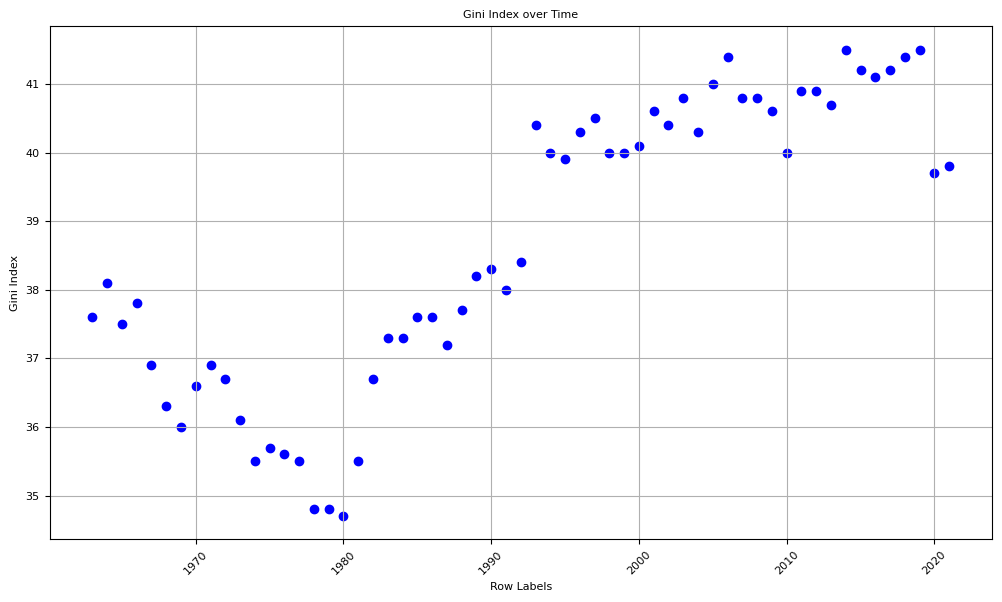

In [251]:
import matplotlib.pyplot as plt

# Define the column name
column_name = 'Gini Index'

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df['Row Labels'], df[column_name], marker='o', color='b')

# Add labels and title
plt.xlabel('Row Labels')
plt.ylabel(column_name)
plt.title(f'{column_name} over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


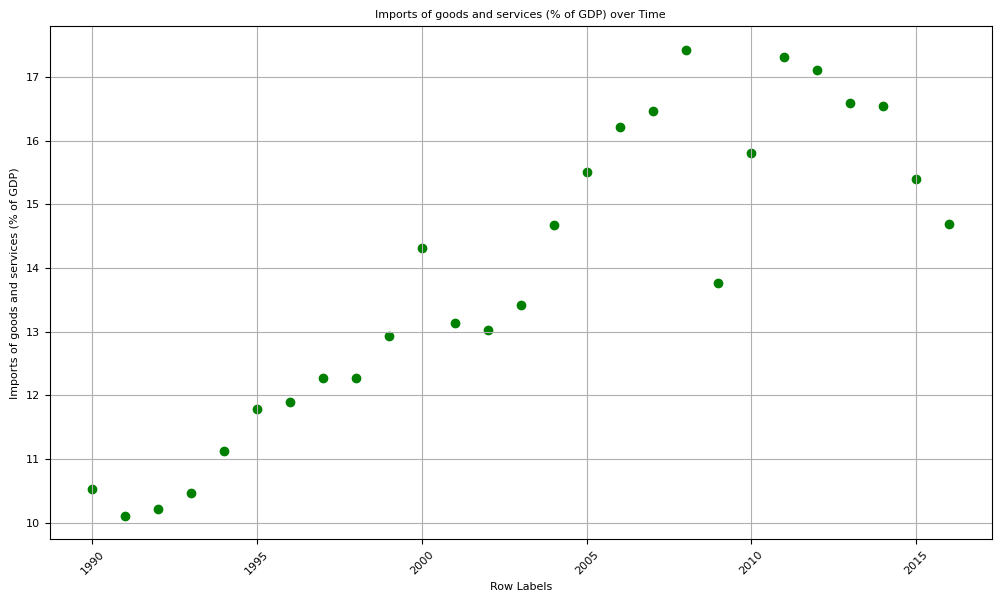

In [253]:
import matplotlib.pyplot as plt

# Define the column name
column_name = 'Imports of goods and services (% of GDP)'

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df['Row Labels'], df[column_name], marker='o', color='g')

# Add labels and title
plt.xlabel('Row Labels')
plt.ylabel(column_name)
plt.title(f'{column_name} over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

As seen in the plots above, we see some trend for each as time progresses, casuing it to affect the GDP which inturn affects the target variabel :   Y ( External Debt %  of GDP) 


In [86]:
%%capture

# Extract the correlation of "Y (External Debt % of GDP)" with all other columns
correlation_with_Y = corr_matrix.iloc[:, -1].abs().sort_values(ascending=False)

print(correlation_with_Y[correlation_with_Y.abs() > 0.8])

strong_correlation_columns = correlation_with_Y[correlation_with_Y.abs() > 0.8].index.tolist()
strong_correlation_columns



In [227]:
%%capture
import matplotlib.pyplot as plt
import numpy as np

# Extracting the debt percentage column
debt_percentage = df[Y_name]
row_labels = df['Row Labels']

# List of columns to plot against debt percentage
columns_to_plot = strong_correlation_columns

# Defining color palette for plotting
colors = plt.cm.inferno(np.linspace(0, 1, len(columns_to_plot)))  # Adjust colormap as needed

# Creating a separate plot for each column
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(8, 2*len(columns_to_plot)))

# Plotting each column separately against debt percentage
for i, column in enumerate(columns_to_plot):
    axs[i].plot(row_labels, df[column], marker='o', linestyle='-', color=colors[i], label=column)
    axs[i].set_ylabel(column)
    axs[i].grid(True)
    axs[i].legend()

# Set x-axis label for the last subplot
axs[-1].set_xlabel('Time Series (Row Labels)')

plt.tight_layout()
plt.show()


## Preprocessing


We handled our missing values using Python’s IterativeImputer from sklearn because of the complex patterns of missingness in our data. We decided against dropping any outliers so our model would include periods of critical global economic events to ensure our model’s ability to handle unexpected scenarios. We also decided not to normalize our variables to preserve relationships within our LSTM model. Data scaling was performed prior to analysis for compatibility with modeling requirements.


In [236]:
%%capture
pd.set_option('display.max_rows', None)
print(df.isna().sum())


In [51]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=42)
imputed_values = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed_values, columns=df.columns[:imputed_values.shape[1]])
df_imputed.tail()


,Row Labels,Age dependency ratio (% of working-age population),"Birth rate, crude (per 1,000 people)",Capital health expenditure (% of GDP),Current health expenditure (% of GDP),"Death rate, crude (per 1,000 people)",Human capital index (HCI) (scale 0-1),"Labor force, total",Net migration,Population growth (annual %),...,EDSTATS: Average Adjusted Secondary Test Score,EDSTATS: Average Adjusted Test Score,"Gross enrolment ratio for tertiary education, both sexes (%)","Gross enrolment ratio, lower secondary, both sexes (%)","Gross enrolment ratio, primary and lower secondary, both sexes (%)","Gross enrolment ratio, primary and secondary, both sexes (%)","Gross enrolment ratio, primary to tertiary, both sexes (%)","Gross enrolment ratio, secondary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Y ( External Debt % of GDP)
60,2020.0,53.220894,10.900000,0.634259,18.815826,10.300000,0.701764,1.656417e+08,6.755600e+05,0.964348,...,49.355764,28.633662,90.215501,100.017463,100.556439,110.670897,105.062160,91.669450,96.297824,118.420751
61,2021.0,53.661595,11.000000,0.628195,19.773282,10.400000,0.671263,1.661899e+08,5.615800e+05,0.156747,...,45.236443,26.871404,88.562646,99.730232,100.141770,108.906910,103.384455,91.747860,96.360385,113.705197
62,2022.0,54.053673,15.537431,0.621260,17.821670,8.822787,0.648545,1.692292e+08,9.700252e+05,0.377565,...,50.000910,43.612465,89.222697,101.214269,100.822371,110.242278,104.633513,91.538983,94.609313,110.146803
63,2023.0,36.718444,15.374920,0.613872,17.044693,8.802009,0.647746,1.938867e+08,1.048834e+06,0.962233,...,53.922221,44.066287,81.411495,101.362431,100.995751,105.127061,96.932138,92.374627,93.725206,65.450584
64,2024.0,36.080251,15.376689,0.614374,17.041962,8.802073,0.647746,1.938867e+08,1.048834e+06,0.961012,...,53.912748,44.060900,81.838229,101.360222,100.998105,105.242658,97.063074,92.373995,93.724511,65.756364




Since our time series data exhibits complex temporal dependencies, trends, and seasonality, it can pose as a challenge for  Random Forests so we utilized xgboost to find feature importance.

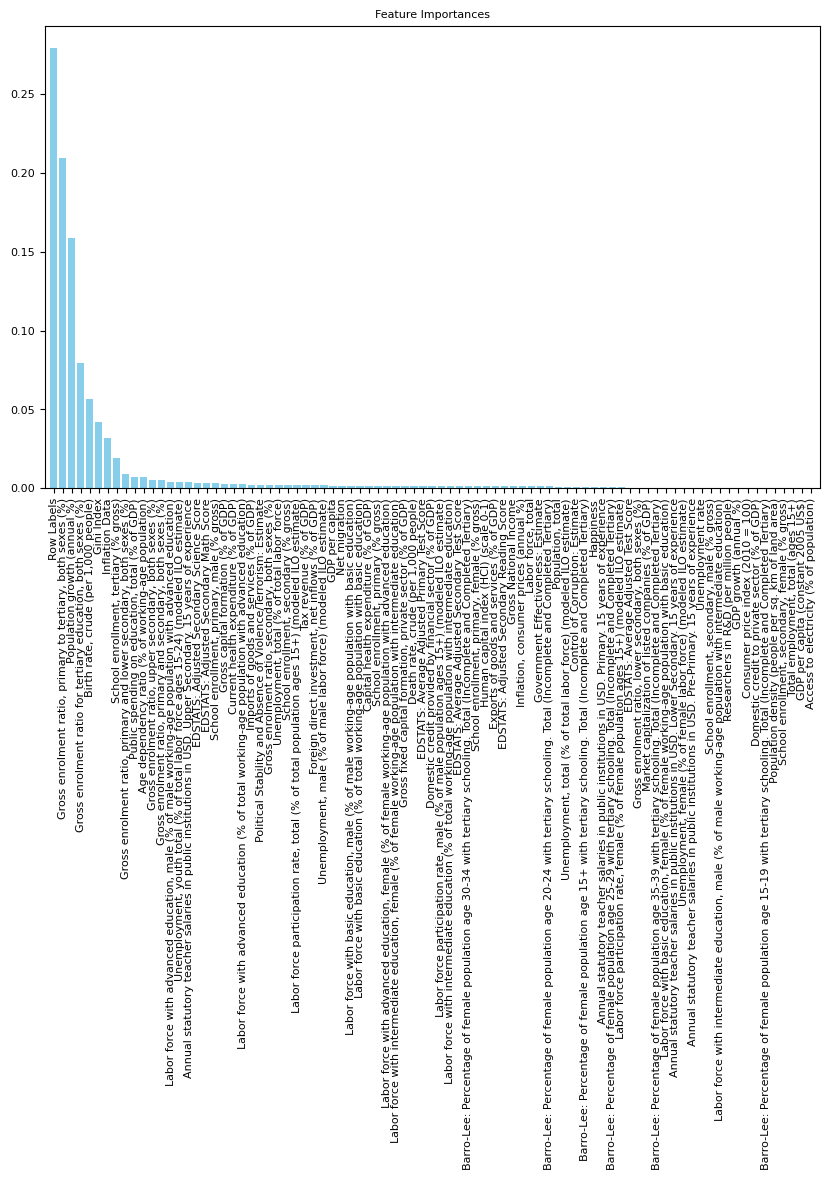

In [238]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming your target variable is in a column named 'target'
X = df_imputed.drop('Y ( External Debt %  of GDP)', axis=1)  # Features
y = df_imputed['Y ( External Debt %  of GDP)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Plot feature importances
importances = model.feature_importances_
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

The features identified, such as age dependency ratio, birth rate, health expenditure, and population growth, are likely influential in predicting external debt due to their reflection of demographic dynamics and government spending priorities. Higher dependency ratios and healthcare expenditures may strain resources, while population growth and labor force changes can necessitate increased borrowing for infrastructure and social services to support growing populations. These factors highlight the complex interplay between demographic trends, public investment, and fiscal policy in shaping a country's debt profile.

Although this data is useful we see only health related metrics being pulled up. This would not consider all the pther factors that might also affect debt for a country.

In [243]:
Rows_xgboost=X.columns[:10]


Index(['Row Labels', 'Age dependency ratio (% of working-age population)',
       'Birth rate, crude (per 1,000 people)',
       'Capital health expenditure (% of GDP)',
       'Current health expenditure (% of GDP)',
       'Death rate, crude (per 1,000 people)',
       'Human capital index (HCI) (scale 0-1)', 'Labor force, total',
       'Net migration', 'Population growth (annual %)'],
      dtype='object')

In [241]:
%%capture
import matplotlib.pyplot as plt
import numpy as np

# Extracting the debt percentage column
debt_percentage = df[Y_name]
row_labels = df['Row Labels']

# List of columns to plot against debt percentage
columns_to_plot = Rows_xgboost

# Defining color palette for plotting
colors = plt.cm.inferno(np.linspace(0, 1, len(columns_to_plot)))  # Adjust colormap as needed

# Creating a separate plot for each column
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(8, 2*len(columns_to_plot)))

# Plotting each column separately against debt percentage
for i, column in enumerate(columns_to_plot):
    axs[i].plot(row_labels, df[column], marker='o', linestyle='-', color=colors[i], label=column)
    axs[i].set_ylabel(column)
    axs[i].grid(True)
    axs[i].legend()

# Set x-axis label for the last subplot
axs[-1].set_xlabel('Time Series (Row Labels)')

plt.tight_layout()
plt.show()

In [245]:

%%capture
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
Rows_full = Rows_xgboost.append(pd.Index([Y]))
df_var=df_imputed[Rows_full]

bandwidth = estimate_bandwidth(df_var, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df_var)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

In [246]:
%%capture

# Add labels to the DataFrame
df_var['labels'] = labels

# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot data points with color representing cluster labels
for label in labels_unique:
    cluster = df_var[df_var['labels'] == label]
    plt.scatter(cluster.iloc[:, 0], cluster.iloc[:, 1], label=f'Cluster {label}')

# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', color='k', s=100, label='Cluster Centers')

plt.title('MeanShift Clustering')

plt.legend()
plt.show()

# Modeling


Our VAR model forecasts each variable as a time series while also taking into account the interdependencies between the multiple time series. A lot of economic and social indicators are interdependent on each other, making this the ideal model for the problem we’re trying to solve. 
However, we discovered that VAR has some minimum requirements for the ratio of number of observations to features . For instance, if a VAR model with p lags has k variables then n, the number of observations, should satisfy n > k x p. In our case, n= 63 which means that we can have either 3 lags and 21 features or 4 lags and 14 features. This severely limits the number of features we can work with. So we decided to go with LSTM instead. 

In [145]:
#%pip install vars
from statsmodels.tsa.api import VAR


In [153]:

Rows_full = Rows_xgboost.append(pd.Index([Y]))
df_var=df_imputed[Rows_full]


In [169]:
from statsmodels.tsa.api import VAR


model = VAR(df_var)
result = model.select_order(maxlags=4)
optimal_lag = result.aic

result.summary()


,AIC,BIC,FPE,HQIC
0,53.40,53.78,1.559e+23,53.55
1,2.252,6.820*,10.07,4.042
2,3.639,12.39,58.54,7.070
3,-0.2131,12.73,3.908,4.859
4,-5.124*,12.01,0.5748*,1.589*


### LSTM


The LSTM model is good at capturing long term temporal dependencies. 
We used a function (split_sequences) to split our temporal data into past observations and future observations. For instance, the first 55 years would be treated as past observations (X) and the following 7 years would be treated as the future observations (y) (the output that the model predicts). 
Upon evaluation, our LSTM model gave us a mean absolute error of 0.27

In [107]:
%pip install tensorflow
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, Dropout

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

In [108]:
from numpy import hstack,array

def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [109]:
data = df_imputed.to_numpy()
# number of steps in and out
n_steps_in, n_steps_out = 53, 5


In [110]:
# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)
# Split into input and outputs 
X, y = split_sequences(data_normalized, n_steps_in, n_steps_out)

In [111]:
X_train = X[:-n_steps_out]
y_train = y[:-n_steps_out]

X_test = X[-n_steps_out:]
y_test = y[-n_steps_out:]

In [112]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps_in, X.shape[2])))
model.add(RepeatVector(n_steps_out))  # Specifies the number of time steps to predict
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(X.shape[2])))  # Output layer that predicts features at each time step
model.compile(optimizer='adam', loss='mse')

C:\Users\nandi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [113]:
# Fit model
model.fit(X_train, y_train, epochs=300, verbose=0)

In [114]:
from sklearn.metrics import mean_absolute_error

# Predict the test set
yhat = model.predict(X_test, verbose=0)

# Rescale the predictions back to the original scale
#yhat_rescaled = scaler.inverse_transform(yhat.reshape(-1, X.shape[2])).reshape(yhat.shape)

#yhat_rescaled = scaler.inverse_transform(yhat)

# Rescale the actual test values back to the original scale
#y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, y.shape[2])).reshape(y_test.shape)

#y_test_rescaled = scaler.inverse_transform(y_test)

In [115]:
yhat_reshaped = yhat.reshape(-1, yhat.shape[2])  # Reshape to (n_samples * n_timesteps, n_features)
y_test_reshaped = y_test.reshape(-1, y_test.shape[2])  # Same reshaping for true values

In [116]:
mae_per_timestep = mean_absolute_error(y_test_reshaped, yhat_reshaped, multioutput='raw_values')

In [117]:
overall_mae = mean_absolute_error(y_test_reshaped, yhat_reshaped)
overall_mae

0.2619017366218691

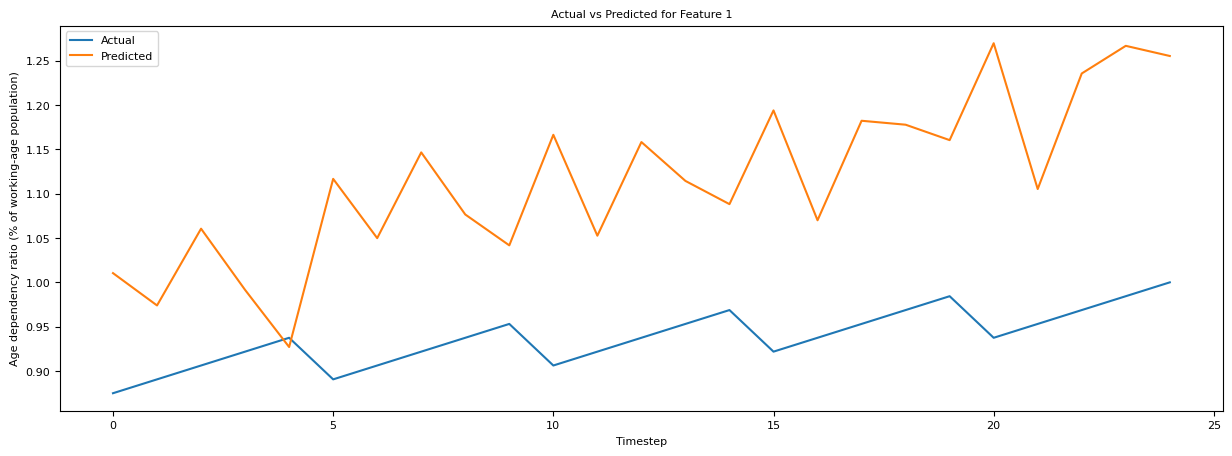

In [118]:
%%capture
import matplotlib.pyplot as plt

feature_name = df.columns[0 +1]

plt.figure(figsize=(15,5))
plt.plot(y_test_reshaped[:, 0], label='Actual')  # Select the first feature (0 index)
plt.plot(yhat_reshaped[:, 0], label='Predicted')  # Select the first feature (0 index)
plt.title('Actual vs Predicted for Feature 1')
plt.xlabel('Timestep')
plt.ylabel(feature_name)
plt.legend()
plt.show()

In [264]:
%%capture

feature_name = df.columns[1 +1]

plt.figure(figsize=(15,5))
plt.plot(y_test_reshaped[:, 1], label='Actual')  # Select the first feature (0 index)
plt.plot(yhat_reshaped[:, 1], label='Predicted')  # Select the first feature (0 index)
plt.title('Actual vs Predicted for Feature 1')
plt.xlabel('Timestep')
plt.ylabel(feature_name)
plt.legend()
plt.show()

Plotting the predicted values layerd over the actual values for the death rate column over the same timeperiod

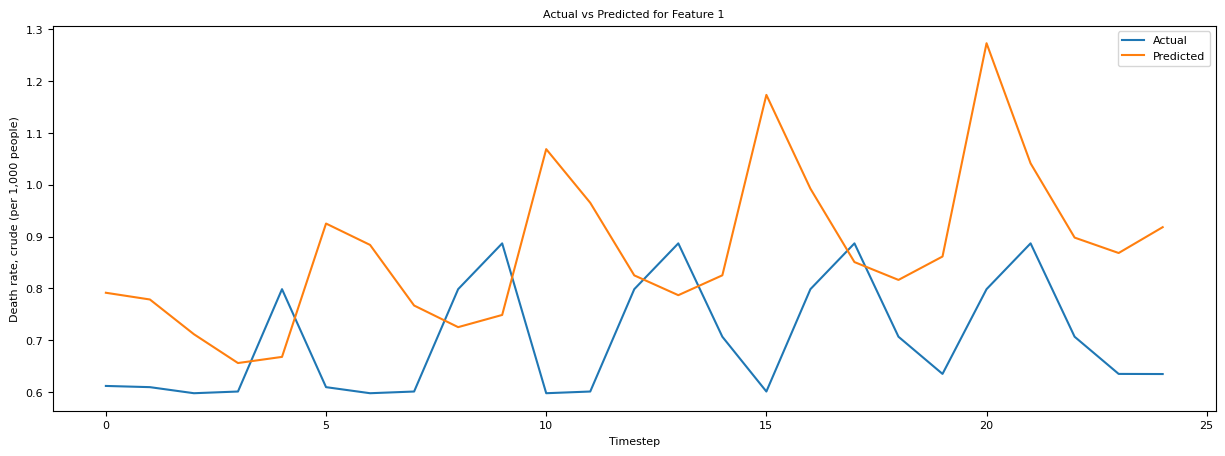

In [263]:


feature_name = df.columns[4+1]

plt.figure(figsize=(15,5))
plt.plot(y_test_reshaped[:, 4], label='Actual')  # Select the first feature (0 index)
plt.plot(yhat_reshaped[:, 4], label='Predicted')  # Select the first feature (0 index)
plt.title('Actual vs Predicted for Feature 1')
plt.xlabel('Timestep')
plt.ylabel(feature_name)
plt.legend()
plt.show()

### Problems & Challenges

VAR models have a hard cap of 15 features for our dataset which made them ineffective for our dataset that had 86 columns.
Limited availability of historical data prior to the 2000’s for many of our features. 
This led to our next challenge, which was deciding which imputation technique we could use for our data that would account for the several missing years without creating a bias as several of the imputation methodologies we looked at were best for data that had a linear relationship. 


 


### Next steps

The next steps we have planned for our project include:
- We discovered that for LSTM models validation data does not have to come from the same distribution as training data, but it does need to have the same distribution as the problem we are trying to solve. So, to increase the amount of training data available we plan on adding data from a few other countries that have similar financial situations as the U.S. 
- We intend to run an XGBoost feature importance model on all the indicators from the World Bank raw data. This would further refine our model. Transform our target variable from external debt as a percentage of GDP, to absolute external debt.
- Going forward we plan to perform grid search to do hyperparameter tuning.

